In [1]:
import cellPLATO as cp

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import imageio

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

OVERWRITE_DATAFRAMES = True

Finished running cellPLATO initialization and loaded config.
Initializing:  ThreeConditions_Go_Stopping_Stopped_1-12-2023
Hypthesis testing using:  st.ttest_ind
Plots will be exported to:  D:/Michael_Shannon/CELLPLATO_MASTER/OCTOBERTESTING_/ThreeConditions_Go_Stopping_Stopped_1-12-2023_OUTPUT/ThreeConditions_Go_Stopping_Stopped_1-12-2023\2023-01-19_14-21-21-593351\plots/
Using unique embedding per dataset shortname:  ThreeConditions_Go_Stopping_Stopped_1-12-2023
Exporting static Superplots
Exporting static Superplots
Exporting static Plots of Differences
Exporting static Marginal scatterplots
Exporting static Timeplots
Exporting Bar plots
Exporting SNS Bar plots
Using corresponding CTL_SHORTLABEL:  Untreated  for condition:  Condition_Migrating
Dataset in current notebook:  ThreeConditions_Go_Stopping_Stopped_1-12-2023
Finished initializing data_processing
Finished intializing visualizations
Finished initializing cellPLATO


In [2]:
# Get the experiment list from the experiments listed in the config 
exp_list = cp.populate_experiment_list()
display(exp_list)

,Condition,Experiment,Replicate_ID,Condition_shortlabel,Replicate_shortlabel
0,Condition_Migrating,PBMCeNK_untreated_1__tracks,PBMCeNK_untreated_1__tracks,Untreated,Untreated_0
1,Condition_Slowing,PBMCeNK_CytoD_1_tracks,PBMCeNK_CytoD_1_tracks,CytoD 0.5 uM,CytoD 0.5 uM_0
2,Condition_Stopped,PBMCeNK_CytoD_2_tracks,PBMCeNK_CytoD_2_tracks,CytoD 2 uM,CytoD 2 uM_0


In [3]:
tptlabel_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv')

In [10]:
def plot_plasticity_changes_notebook(df, identifier='\_allcells'):
    MIG_T_WIND=12

    # f, axes = plt.subplots(1, 3, figsize=(15, 5)) #sharex=True
    # f, axes = plt.subplots(3, 1, figsize=(15, 30), sharex=True) #sharex=True
    f, axes = plt.subplots(3, 1, figsize=(15, 30), sharex=False) #sharex=True

    whattoplot=['label','twind_n_changes', 'twind_n_labels']

    CLUSTER_CMAP = 'tab20'
    CONDITION_CMAP = 'dark'

    time = df['frame']
    SAMPLING_INTERVAL=10/60 #This shouldn't be hardcoded!
    timeminutes=time*SAMPLING_INTERVAL

    # dfnumericals = df.select_dtypes('number')

    # extracted_col = df["Condition_shortlabel"]

    # df=dfnumericals.join(extracted_col)

    import seaborn as sns
    sns.set_theme(style="ticks")
    sns.set_palette(CONDITION_CMAP)
    # display(df)
    df=df.dropna(how='any')
    # display(df)
    # Plot the responses for different events and regions
    sns.lineplot(ax=axes[0], x=timeminutes, y=whattoplot[0], #n_labels #n_changes #label
                 hue="Condition_shortlabel",
                 data=df)

    sns.lineplot(ax=axes[1], x=timeminutes, y=whattoplot[1], #n_labels #n_changes #label
                 hue="Condition_shortlabel",
                 data=df)

    sns.lineplot(ax=axes[2], x=timeminutes, y=whattoplot[2], #n_labels #n_changes #label
                 hue="Condition_shortlabel",
                 data=df)

    timewindowmins = MIG_T_WIND*SAMPLING_INTERVAL
    text1 = "Cluster ID per frame"
    text2 = "Distinct changes per " + str(timewindowmins) + " min time window"
    text3 = "New cluster changes per " + str(timewindowmins) + " min time window"

    x_lab = "Distinct Behaviors"
    plottitle = ""
    # Tweak the visual presentation
    axes[0].xaxis.grid(True)
    axes[1].xaxis.grid(True)
    axes[2].xaxis.grid(True)

    # axes[0].set_ylabel(whattoplot[0], fontsize=36)
    # axes[1].set_ylabel(whattoplot[1], fontsize=36)
    # axes[2].set_ylabel(whattoplot[2], fontsize=36)
    axes[0].set_ylabel(text1, fontsize=36)
    axes[1].set_ylabel(text2, fontsize=36)
    axes[2].set_ylabel(text3, fontsize=36)

    axes[0].set_title("", fontsize=36)
    axes[1].set_title("", fontsize=36)
    axes[2].set_title("", fontsize=36)

    axes[0].set_xlabel("Time (min)", fontsize=36)
    axes[1].set_xlabel("Time (min)", fontsize=36)
    axes[2].set_xlabel("Time (min)", fontsize=36)

    axes[0].set_ylim(0, np.nanmax(df[whattoplot[0]]))
    axes[1].set_ylim(0, np.nanmax(df[whattoplot[1]]))
    axes[2].set_ylim(0, np.nanmax(df[whattoplot[2]]))

    # ax.set_ylabel(y_lab, fontsize=36)
    axes[0].tick_params(axis='both', labelsize=36)
    axes[1].tick_params(axis='both', labelsize=36)
    axes[2].tick_params(axis='both', labelsize=36)

    axes[0].legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left',fontsize=36,markerscale=20,fancybox=True)
    axes[1].legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left',fontsize=36,markerscale=20,fancybox=True)
    axes[2].legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left',fontsize=36,markerscale=20,fancybox=True)

    f.tight_layout()
    # fig.write_image(CLUST_DISAMBIG_DIR+'\cluster_label_counts.png')
    # f.savefig(CLUST_DISAMBIG_DIR+identifier+'_plasticity_cluster_changes_over_time.spotpng', dpi=300)#plt.

    return

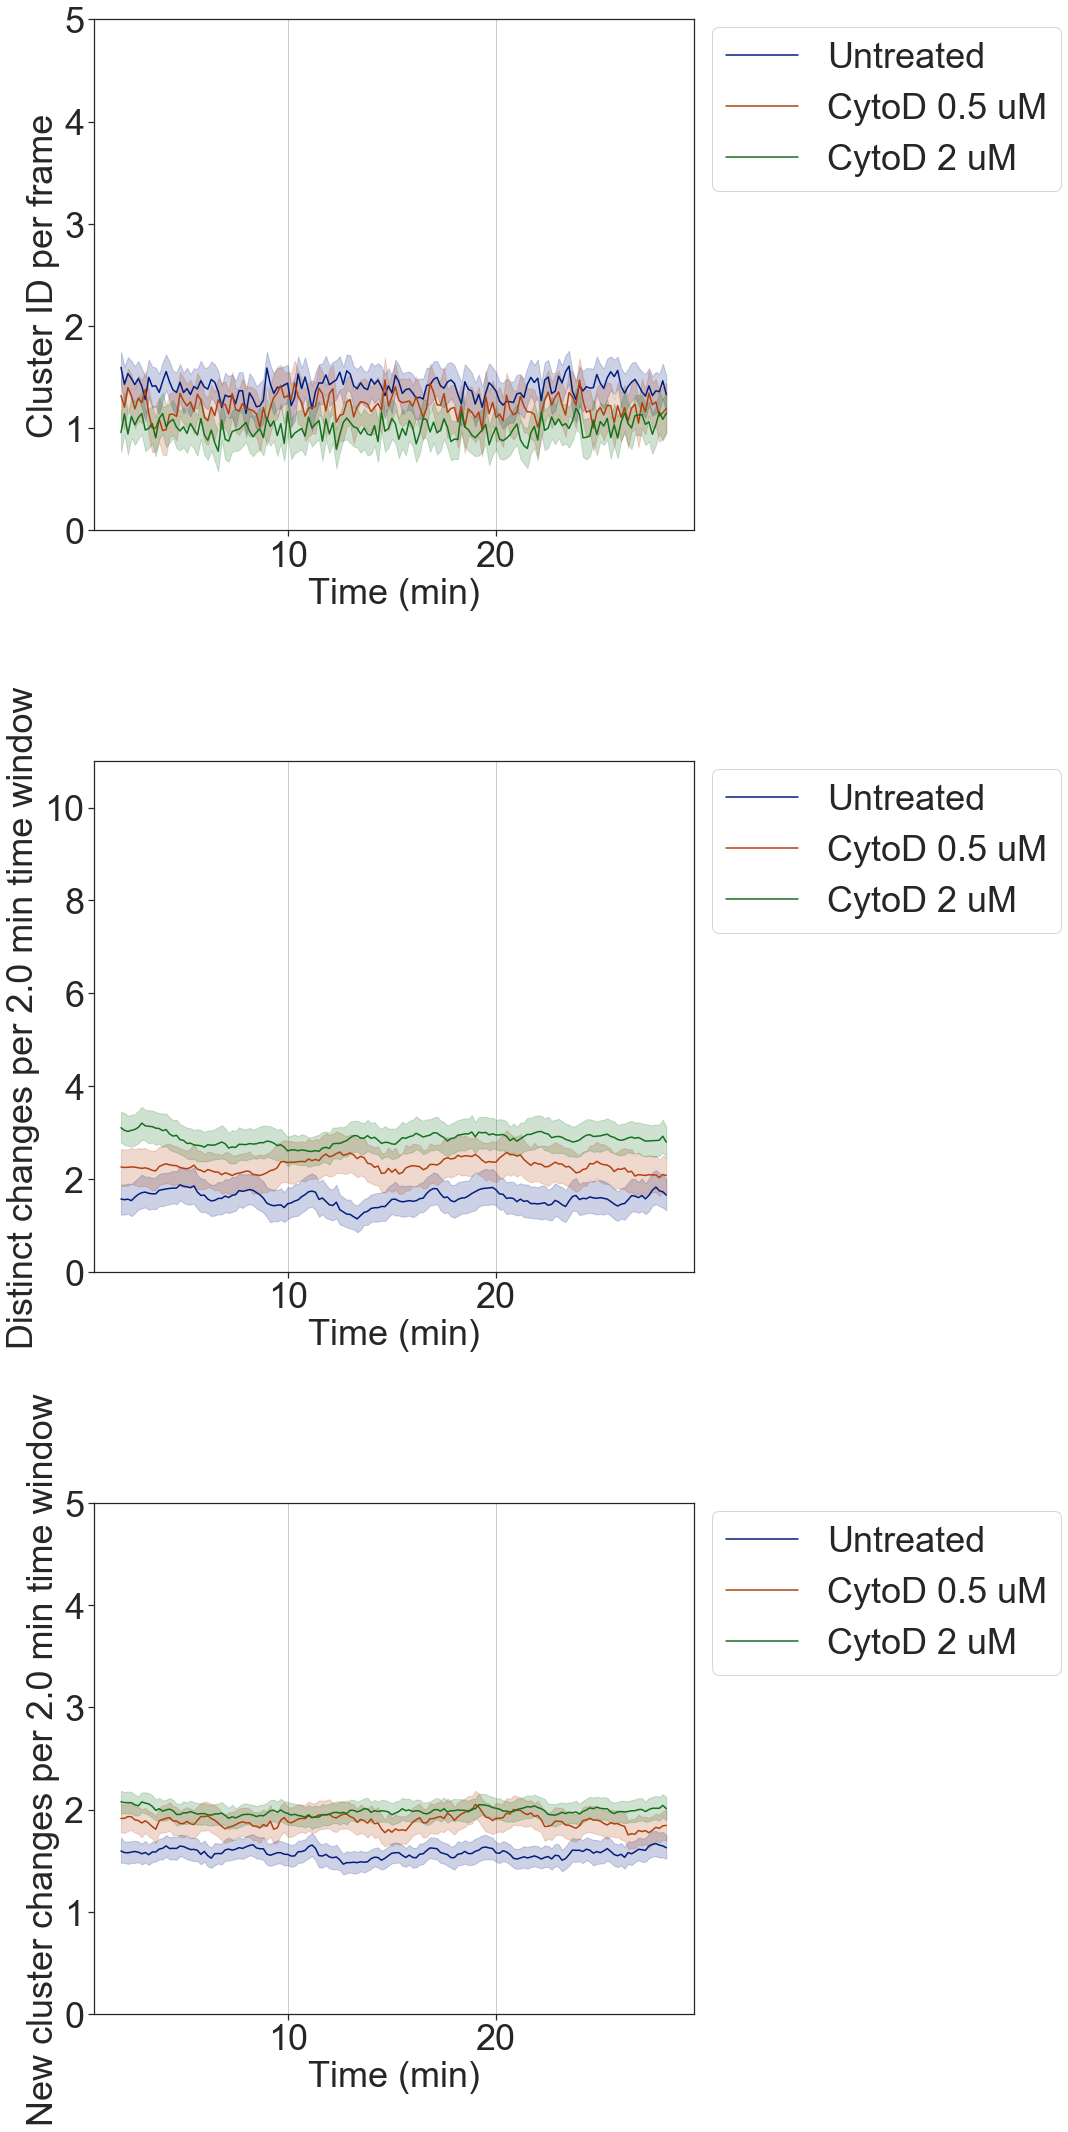

In [11]:
df=tptlabel_dr_df
# all='\_allcells'
plot_plasticity_changes_notebook(df, identifier='\_allcells') #problem with NaNs in the data

In [ ]:
# Load, process and combine the dataframes (including segmentation and migration calculations)
comb_df = cp.combine_dataframes(exp_list)

comb_df = cp.measurement_pipeline(comb_df)

# Returns a filtered dataframe, while also adding included column to comb_df
comb_df, filt_counts = cp.apply_filters(comb_df)

# Process a time-averaged DataFrame
tavg_df = cp.time_average(comb_df)

In [1]:
# von mises per time window

import numpy as np
from scipy.stats import vonmises

# Generate some fake data
np.random.seed(42)
data = vonmises.rvs(kappa=5, size=100)
print(data)
# Fit the data to a von Mises distribution
fit = vonmises.fit(data)

# Extract the kappa component from the fit
kappa = fit[0]

print(f'Kappa: {kappa}')

[ 0.29580424 -0.59395408 -0.59851011 -0.15445292 -0.23032145 -0.21900579
 -0.21979478  1.1336656   0.58255977  0.1224337   0.23064777 -0.36556094
 -0.19168127 -0.46706312 -0.59255576 -0.14178001  0.31002414  0.27845879
 -0.10043622  0.14388335 -1.07288984 -0.64165526  0.23627055  0.40370265
 -0.47085535  0.07639338  0.23927185  0.18390976 -0.16742252  0.49520463
 -0.24253485  0.35087551 -0.00487785 -0.16212292 -0.46525604 -0.18594053
  0.21352891 -0.4430402   0.1033597   0.17804239 -0.17448544  0.66028412
 -0.06375454  0.13453699  0.76545182 -0.16559434  0.80086095 -0.09793667
  0.19099083 -0.51968248  0.26172986  0.05936192 -0.60851162 -0.73050798
  0.50954795 -0.16383086  0.24921061 -0.54090761  0.19699521  0.31455435
 -0.55535244 -0.8940342   0.68878667  0.29147692  0.35207042 -0.30638552
  0.12165881 -0.81494752  0.0998186  -0.83331185  0.45485535  0.69887761
  0.29683963  0.02524284 -0.21498206 -0.02623236  0.09028806 -0.15717776
  0.03633614  0.67119113  0.46175299 -0.20169024 -0